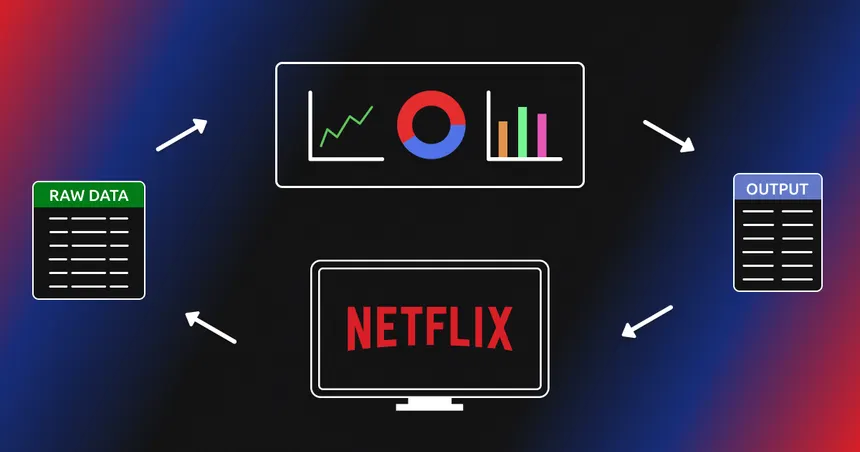

In [1]:
import requests
import pandas as pd
import time
from datetime import datetime

# API_KEY = "your api key is here "
BASE_URL = "https://api.themoviedb.org/3"
           #"https://www.themoviedb.org/"
NETFLIX_ID = 8

MOVIE_PAGES = 100   # 100 pages = 2000 movies
TV_PAGES = 100      # 100 pages = 2000 TV shows

print("\n" + "="*70)
print("NETFLIX RAW DATA SCRAPER")
print("="*70)
print("\nProject: Netflix Content Acquisition Strategy Analysis")
print(f"Target: {MOVIE_PAGES * 20} movies + {TV_PAGES * 20} TV shows\n")


# TEST API CONNECTION


print("🔧 Testing API connection...")

test_url = f"{BASE_URL}/configuration?api_key={API_KEY}"
test_response = requests.get(test_url, timeout=10)

if test_response.status_code == 200:
    print(" API connection successful!\n")
else:
    print(f" API Error: {test_response.status_code}")
    print("Scraping aborted!")
    exit()

# SCRAPE NETFLIX MOVIES

print("="*70)
print(f" SCRAPING NETFLIX MOVIES ({MOVIE_PAGES} pages)")
print("="*70)

movies_list = []
for page in range(1, MOVIE_PAGES + 1):
    print(f"Page {page}/{MOVIE_PAGES}... ", end="")  
    # Build API request
    url = f"{BASE_URL}/discover/movie"
    params = {
        'api_key': API_KEY,
        'with_watch_providers': NETFLIX_ID,
        'watch_region': 'US',
        'sort_by': 'popularity.desc',
        'page': page}
    try:
        # Make request
        response = requests.get(url, params=params, timeout=10)  
        if response.status_code == 200:
            data = response.json()
            results = data.get('results', [])      
            print(f"✓ {len(results)} movies")      
            # Store raw data
            for movie in results:
                movies_list.append({
                    'tmdb_id': movie.get('id'),
                    'title': movie.get('title'),
                    'original_title': movie.get('original_title'),
                    'content_type': 'Movie',
                    'release_date': movie.get('release_date'),
                    'genre_ids': str(movie.get('genre_ids', [])),
                    'vote_average': movie.get('vote_average'),
                    'vote_count': movie.get('vote_count'),
                    'popularity': movie.get('popularity'),
                    'original_language': movie.get('original_language'),
                    'overview': movie.get('overview'),
                    'adult': movie.get('adult'),
                    'video': movie.get('video'),
                    'poster_path': movie.get('poster_path'),
                    'backdrop_path': movie.get('backdrop_path'),
                    'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                })
        else:
            print(f"✗ Error {response.status_code}")
            
    except Exception as e:
        print(f"✗ {e}")
    
    # Wait to respect API limits
    time.sleep(0.25)

print(f"\n Total movies scraped: {len(movies_list)}")


#  SCRAPE NETFLIX TV SHOWS


print("\n" + "="*70)
print(f" SCRAPING NETFLIX TV SHOWS ({TV_PAGES} pages)")
print("="*70)

tv_list = []

for page in range(1, TV_PAGES + 1):
    print(f"Page {page}/{TV_PAGES}... ", end="")
    
    # Build API request
    url = f"{BASE_URL}/discover/tv"
    params = {
        'api_key': API_KEY,
        'with_watch_providers': NETFLIX_ID,
        'watch_region': 'US',
        'sort_by': 'popularity.desc',
        'page': page
    }
    
    try:
        # Make request
        response = requests.get(url, params=params, timeout=10)
        
        if response.status_code == 200:
            data = response.json()
            results = data.get('results', [])
            
            print(f"✓ {len(results)} shows")
            
            # Store raw data
            for show in results:
                tv_list.append({
                    'tmdb_id': show.get('id'),
                    'title': show.get('name'),
                    'original_title': show.get('original_name'),
                    'content_type': 'TV Show',
                    'release_date': show.get('first_air_date'),
                    'genre_ids': str(show.get('genre_ids', [])),
                    'vote_average': show.get('vote_average'),
                    'vote_count': show.get('vote_count'),
                    'popularity': show.get('popularity'),
                    'original_language': show.get('original_language'),
                    'overview': show.get('overview'),
                    'adult': show.get('adult'),
                    'video': None,
                    'poster_path': show.get('poster_path'),
                    'backdrop_path': show.get('backdrop_path'),
                    'scraped_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                })
        else:
            print(f"✗ Error {response.status_code}")
            
    except Exception as e:
        print(f"✗ {e}")
    
    # Wait to respect API limits
    time.sleep(0.25)

print(f"\n Total TV shows scraped: {len(tv_list)}")



# COMBINE AND SAVE DATA


print("\n" + "="*70)
print(" SAVING DATA")
print("="*70)

# Combine movies and TV shows
all_data = movies_list + tv_list

print(f"\nMovies: {len(movies_list)}")
print(f"TV Shows: {len(tv_list)}")
print(f"Total records: {len(all_data)}")

# Convert to DataFrame
df = pd.DataFrame(all_data)

# Create filename 
filename = "raw_netflix_data.csv"


# Save to CSV
df.to_csv(filename, index=False)

print(f"\n Data saved to: {filename}")
print(f"   Rows: {len(df)}")
print(f"   Columns: {len(df.columns)}")



print("\n" + "="*70)
print(" SCRAPING COMPLETE!")
print("="*70)
print("\n Raw data file created successfully")



NETFLIX RAW DATA SCRAPER

Project: Netflix Content Acquisition Strategy Analysis
Target: 2000 movies + 2000 TV shows

🔧 Testing API connection...
 API connection successful!

 SCRAPING NETFLIX MOVIES (100 pages)
✓ 20 movies.. 
Page 2/100... ✓ 20 movies
Page 3/100... ✓ 20 movies
Page 4/100... ✓ 20 movies
Page 5/100... ✓ 20 movies
Page 6/100... ✓ 20 movies
Page 7/100... ✓ 20 movies
Page 8/100... ✓ 20 movies
Page 9/100... ✓ 20 movies
Page 10/100... ✓ 20 movies
Page 11/100... ✓ 20 movies
Page 12/100... ✓ 20 movies
Page 13/100... ✓ 20 movies
Page 14/100... ✓ 20 movies
Page 15/100... ✓ 20 movies
Page 16/100... ✓ 20 movies
Page 17/100... ✓ 20 movies
Page 18/100... ✓ 20 movies
Page 19/100... ✓ 20 movies
Page 20/100... ✓ 20 movies
Page 21/100... ✓ 20 movies
Page 22/100... ✓ 20 movies
Page 23/100... ✓ 20 movies
Page 24/100... ✓ 20 movies
Page 25/100... ✓ 20 movies
Page 26/100... ✓ 20 movies
Page 27/100... ✓ 20 movies
Page 28/100... ✓ 20 movies
Page 29/100... ✓ 20 movies
Page 30/100... ✓ 20 movi

In [38]:
import pandas as pd
df = pd.read_csv(r'raw_netflix_data.csv')
df

,tmdb_id,title,original_title,content_type,release_date,genre_ids,vote_average,vote_count,popularity,original_language,overview,adult,video,poster_path,backdrop_path,scraped_date
0,1267319,Mantis,사마귀,Movie,2025-09-26,"[28, 80, 53]",5.800,29,445.4668,ko,"Mantis, an ace assassin, returns to the contra...",False,False,/xS9bbciDC5lHPgl79SrPyzxKAXL.jpg,/ckT96Sn8r1IDNyIBJ1mDZ1Jh2kR.jpg,2025-10-01 14:47:28
1,803796,KPop Demon Hunters,KPop Demon Hunters,Movie,2025-06-20,"[10751, 10402, 35, 12, 14, 16]",8.284,1543,142.4078,en,"When K-pop superstars Rumi, Mira and Zoey aren...",False,False,/22AouvwlhlXbe3nrFcjzL24bvWH.jpg,/w3Bi0wygeFQctn6AqFTwhGNXRwL.jpg,2025-10-01 14:47:28
2,1289888,French Lover,French Lover,Movie,2025-09-25,"[10749, 35]",5.475,60,95.2856,fr,When a jaded actor meets a down-on-her-luck wa...,False,False,/jekag0zxQ15kuMEQsc58r6UN3Ny.jpg,/p4OIGFfVo3vbROMD1evVF0u14Rf.jpg,2025-10-01 14:47:28
3,1119878,Ice Road: Vengeance,Ice Road: Vengeance,Movie,2025-06-27,"[28, 53, 18]",6.363,433,80.2498,en,Big rig ice road driver Mike McCann travels to...,False,False,/cQN9rZj06rXMVkk76UF1DfBAico.jpg,/2nwhxEyefcIFKwOrSigiamoIzu2.jpg,2025-10-01 14:47:28
4,1371189,Ruth & Boaz,Ruth & Boaz,Movie,2025-09-25,"[10749, 18, 10402]",7.158,19,69.5096,en,A talented singer leaves the Atlanta music sce...,False,False,/mtMJEIHjeHcLtvP0tFPAptk1Var.jpg,/m2e8GUES92IaXRCLxWElJnlZ34w.jpg,2025-10-01 14:47:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,119917,Let's Fight Ghost,คู่ไฟท์ไฝว้ผี,TV Show,2021-03-03,"[10759, 18, 9648]",7.700,12,1.5461,th,A cohabitation comedy about a ghost of a high ...,False,NaN,/eHKxpDheZPV44KjwPCG9bjWmqI8.jpg,/j1VOwsf6Td9b3v0ohFC8Do8t0Aa.jpg,2025-10-01 14:50:16
3996,119105,Feria: The Darkest Light,Feria: La luz más oscura,TV Show,2022-01-28,[10765],6.621,227,1.2713,es,Two sisters must face a new reality — and supe...,False,NaN,/k1m4aydO6752Czydk3Z8dR4yP0L.jpg,/shftekqAkBsGvHoXKgGMsGVjE5q.jpg,2025-10-01 14:50:16
3997,247833,The Greatest Rivalry: India vs Pakistan,The Greatest Rivalry: India vs Pakistan,TV Show,2025-02-07,[99],7.200,5,1.6059,en,Tracing the cricketing rivalry between India a...,False,NaN,/u55qpaaim6FdKQY51jwxDCMsuB1.jpg,/s0eW6fwZ9ciAUXNpxpcsdSIpoof.jpg,2025-10-01 14:50:16
3998,211694,Island of the Sea Wolves,Island of the Sea Wolves,TV Show,2022-10-11,[99],8.500,67,1.7997,en,"Explore wild, wondrous Vancouver Island, where...",False,NaN,/czorJe5tld7NUBwZubwxDZksxrL.jpg,/vXfTNHU5oBYjatT5oP7v5nV9M2Y.jpg,2025-10-01 14:50:16


# Understanding the Raw Data 

In [4]:
print("These are the columns present in the raw dataset:\n", list(df.columns))

These are the columns present in the raw dataset:
 ['tmdb_id', 'title', 'original_title', 'content_type', 'release_date', 'genre_ids', 'vote_average', 'vote_count', 'popularity', 'original_language', 'overview', 'adult', 'video', 'poster_path', 'backdrop_path', 'scraped_date']


In [6]:
print(" Column names with data types in the raw dataset:\n")
print(df.dtypes)


 Column names with data types in the raw dataset:

tmdb_id                int64
title                 object
original_title        object
content_type          object
release_date          object
genre_ids             object
vote_average         float64
vote_count             int64
popularity           float64
original_language     object
overview              object
adult                   bool
video                 object
poster_path           object
backdrop_path         object
scraped_date          object
dtype: object


In [7]:
# Count missing values in each column
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

tmdb_id                 0
title                   0
original_title          0
content_type            0
release_date            0
genre_ids               0
vote_average            0
vote_count              0
popularity              0
original_language       0
overview                9
adult                   0
video                2000
poster_path             3
backdrop_path          13
scraped_date            0
dtype: int64


In [8]:
print(" Percentage of missing values:\n")
print((df.isnull().sum() / len(df)) * 100)


 Percentage of missing values:

tmdb_id               0.000
title                 0.000
original_title        0.000
content_type          0.000
release_date          0.000
genre_ids             0.000
vote_average          0.000
vote_count            0.000
popularity            0.000
original_language     0.000
overview              0.225
adult                 0.000
video                50.000
poster_path           0.075
backdrop_path         0.325
scraped_date          0.000
dtype: float64


In [13]:
print("Sample data (first 5 rows):\n")
df.head()

Sample data (first 5 rows):



,tmdb_id,title,original_title,content_type,release_date,genre_ids,vote_average,vote_count,popularity,original_language,overview,adult,video,poster_path,backdrop_path,scraped_date
0,1267319,Mantis,사마귀,Movie,2025-09-26,"[28, 80, 53]",5.800,29,445.4668,ko,"Mantis, an ace assassin, returns to the contra...",False,False,/xS9bbciDC5lHPgl79SrPyzxKAXL.jpg,/ckT96Sn8r1IDNyIBJ1mDZ1Jh2kR.jpg,2025-10-01 14:47:28
1,803796,KPop Demon Hunters,KPop Demon Hunters,Movie,2025-06-20,"[10751, 10402, 35, 12, 14, 16]",8.284,1543,142.4078,en,"When K-pop superstars Rumi, Mira and Zoey aren...",False,False,/22AouvwlhlXbe3nrFcjzL24bvWH.jpg,/w3Bi0wygeFQctn6AqFTwhGNXRwL.jpg,2025-10-01 14:47:28
2,1289888,French Lover,French Lover,Movie,2025-09-25,"[10749, 35]",5.475,60,95.2856,fr,When a jaded actor meets a down-on-her-luck wa...,False,False,/jekag0zxQ15kuMEQsc58r6UN3Ny.jpg,/p4OIGFfVo3vbROMD1evVF0u14Rf.jpg,2025-10-01 14:47:28
3,1119878,Ice Road: Vengeance,Ice Road: Vengeance,Movie,2025-06-27,"[28, 53, 18]",6.363,433,80.2498,en,Big rig ice road driver Mike McCann travels to...,False,False,/cQN9rZj06rXMVkk76UF1DfBAico.jpg,/2nwhxEyefcIFKwOrSigiamoIzu2.jpg,2025-10-01 14:47:28
4,1371189,Ruth & Boaz,Ruth & Boaz,Movie,2025-09-25,"[10749, 18, 10402]",7.158,19,69.5096,en,A talented singer leaves the Atlanta music sce...,False,False,/mtMJEIHjeHcLtvP0tFPAptk1Var.jpg,/m2e8GUES92IaXRCLxWElJnlZ34w.jpg,2025-10-01 14:47:28


In [15]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tmdb_id            4000 non-null   int64  
 1   title              4000 non-null   object 
 2   original_title     4000 non-null   object 
 3   content_type       4000 non-null   object 
 4   release_date       4000 non-null   object 
 5   genre_ids          4000 non-null   object 
 6   vote_average       4000 non-null   float64
 7   vote_count         4000 non-null   int64  
 8   popularity         4000 non-null   float64
 9   original_language  4000 non-null   object 
 10  overview           3991 non-null   object 
 11  adult              4000 non-null   bool   
 12  video              2000 non-null   object 
 13  poster_path        3997 non-null   object 
 14  backdrop_path      3987 non-null   object 
 15  scraped_date       4000 non-null   object 
dtypes: bool(1

In [18]:
print("Summary of Numerical Data:\n")
df.describe()

Summary of Numerical Data:



,tmdb_id,vote_average,vote_count,popularity
count,4.000000e+03,4000.000000,4000.000000,4000.000000
mean,4.171981e+05,6.850956,724.208750,5.694418
std,3.917572e+05,1.125312,1863.791139,13.043229
min,2.500000e+01,0.000000,0.000000,1.002700
25%,9.415550e+04,6.300000,29.000000,2.568850
50%,2.419155e+05,6.940500,111.500000,3.437200
75%,6.812918e+05,7.530000,500.250000,5.187425
max,1.535385e+06,10.000000,23257.000000,445.466800


In [24]:
print(" Value counts for 'content_type':\n", df['content_type'].value_counts(), "\n")
print(" Value counts for 'original_language':\n", df['original_language'].value_counts(), "\n")
print(" Value counts for 'adult':\n", df['adult'].value_counts(), "\n")
print(" Value counts for 'video':\n", df['video'].value_counts(dropna=False).head(10), "\n")

 Value counts for 'content_type':
 content_type
Movie      2000
TV Show    2000
Name: count, dtype: int64 

 Value counts for 'original_language':
 original_language
en    1883
ja     435
ko     322
hi     251
es     250
zh     118
fr      93
te      63
ta      63
th      58
it      49
de      45
pl      42
pt      37
ml      37
tr      35
id      33
ar      32
sv      26
nl      21
no      19
tl      18
da      16
he       7
ru       6
ms       6
ca       4
cn       3
zu       3
xx       3
fa       3
kn       2
uk       2
is       2
af       2
fi       2
eu       2
bn       1
yo       1
bg       1
ga       1
el       1
lb       1
ro       1
Name: count, dtype: int64 

 Value counts for 'adult':
 adult
False    4000
Name: count, dtype: int64 

 Value counts for 'video':
 video
False    2000
NaN      2000
Name: count, dtype: int64 



In [27]:
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 4000 rows and 16 columns.


In [39]:
print(f'The dataset occupied {round(df.memory_usage().sum()/1024/1024,2)} MB Memory')

The dataset occupied 0.46 MB Memory


In [32]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

print(f"Total numerical columns: {len(numerical_cols)}  \n {list(numerical_cols)}")
print(f"Total categorical columns: {len(categorical_cols)} \n {list(categorical_cols)}")

Total numerical columns: 4  
 ['tmdb_id', 'vote_average', 'vote_count', 'popularity']
Total categorical columns: 12 
 ['title', 'original_title', 'content_type', 'release_date', 'genre_ids', 'original_language', 'overview', 'adult', 'video', 'poster_path', 'backdrop_path', 'scraped_date']


In [34]:
print(f"Unique TMDb IDs: {df['tmdb_id'].nunique()} out of {len(df)} rows")


Unique TMDb IDs: 3988 out of 4000 rows


## **Final Data Cleaning & Transformation Summary**

The raw dataset contains **4000 rows and 16 columns** with a mix of numeric, categorical, boolean, and string data types. Before performing any meaningful analysis, several **data cleaning and transformation steps** need to be applied.

### **1. Column Selection and Renaming**

* Unnecessary or redundant columns such as `poster_path`, `backdrop_path`, and `video` (50% missing) may be dropped.
* Column names may be standardized for clarity, e.g., `content_type` instead of `type`, `original_title` instead of `originalTitle` (if needed).

### **2. Data Type Conversions**

* `release_date` → Convert from `object/string` to `datetime` for proper time-based analysis.
* `genre_ids` → Convert from string to a list of integers or categorical labels for genre-based analysis.
* Numeric columns (`vote_average`, `vote_count`, `popularity`) → Ensure proper float/int types for calculations.
* The columns that might newly derived needs to be changed of its data type

### **3. Handling Missing Values**

* Columns with few missing values (`overview`, `poster_path`, `backdrop_path`) → May fill with placeholder text or leave as `NaN` depending on analysis needs.
* Columns with significant missing values (`video`) → Consider dropping or marking as a separate category.

### **4. Handling Duplicates**

* Identify duplicate rows using `tmdb_id` or `title` and remove duplicates to maintain dataset integrity.

### **5. Outlier Detection and Treatment**

* Numeric columns (`vote_average`, `vote_count`, `popularity`) may contain extreme outliers.
* Outliers will be analyzed using statistical methods (IQR or Z-score) and treated appropriately (e.g., capping or removing) if they could bias analysis.

### **6. Handling Inconsistencies**

* Categorical columns such as `original_language` and `content_type` → standardize text (case, typos, formatting).
* Boolean columns like `adult` → ensure consistent True/False values.

### **7. Feature Engineering / Derived Columns**

* Extract **year, month, day** from `release_date` for temporal analysis.
* Compute **popularity scores** or normalized ratings if needed.
* Parse `genre_ids` to create **genre-specific columns** for analysis of genres vs popularity.
* Creating the new columns like type ,decade,vote_reliability,primary_genre,is_series,num_genres,language_grouped,popularity_normalized,recent_release   is_hit etc etc ..    

### **8. Final Checks**

* Validate **data types** for all columns.
* Ensure **no remaining missing values** in key analysis columns.
* Confirm **uniqueness of identifiers** like `tmdb_id`.
* Check that distributions of categorical variables and numeric scores make sense and are free of anomalies.

---

### **Outcome**

After these steps, the dataset will be **clean, consistent, and structured**, making it ready for:

* Exploratory Data Analysis (EDA)
* Visualizations
* Predictive modeling (if applicable)
* Insights on content popularity, genre distribution, language distribution, etc.
